In [1]:
import os
os.chdir("..")

In [2]:
import sys
path_to_repo = os.path.abspath(".") + '/other_repos/Conditional_Density_Estimation/'

if path_to_repo not in sys.path:
    sys.path.insert(0, path_to_repo)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Simulate Densities

In [4]:
from cde.density_simulation import GaussianMixture
#from cde.density_estimator import KernelMixtureNetwork

""" simulate some data """
density_simulator = GaussianMixture(n_kernels=10, ndim_x=2, ndim_y=1, means_std=1.5, random_seed=22)
X, Y = density_simulator.simulate(n_samples=3000)

In [5]:
X

array([[-1.33744357, -1.71349557],
       [-0.63530403, -2.38468701],
       [ 0.59669048,  0.85248832],
       ...,
       [-2.05563023, -1.9755983 ],
       [ 3.45929988,  0.80500101],
       [-4.26883171, -2.84824596]])

In [6]:
Y

array([[-1.20972387],
       [-0.63756764],
       [ 5.54150157],
       ...,
       [ 1.77878261],
       [-2.7592916 ],
       [-4.33846645]])

# Plotting

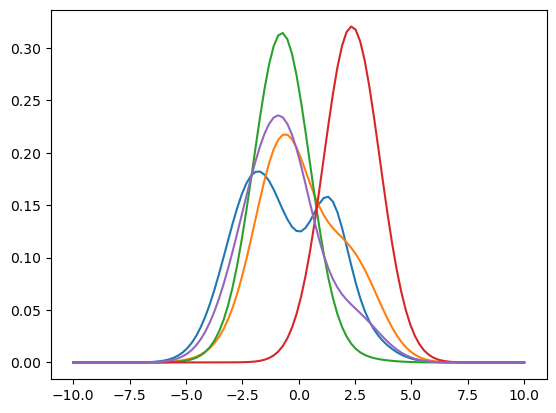

In [7]:
linspace = np.linspace(-10, 10, 100)
y_space = np.reshape(linspace, (-1, 1))


for x in X[np.random.choice(X.shape[0], 5)]:
    x_space = np.repeat(np.reshape(x, (1,-1)), 100, axis=0)
    densities = density_simulator.pdf(x_space, y_space)

    plt.plot(linspace, densities)
plt.show()

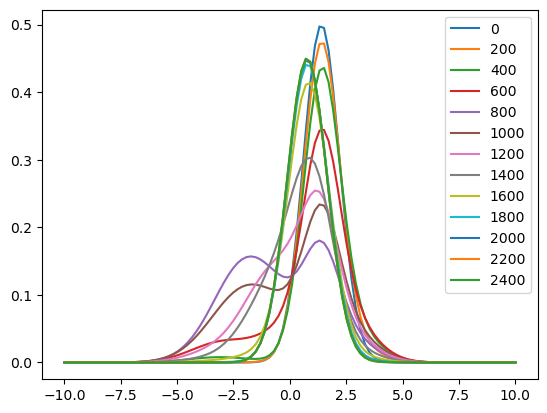

In [8]:
linspace = np.linspace(-10, 10, 100)
y_space = np.reshape(linspace, (-1, 1))

base_x = X[0]
base_x_permuted = np.repeat(np.reshape(base_x, (1,-1)), X.shape[0], axis=0)
base_x_permuted[:,0] = np.sort(X[:,0])

indices = range(0,2500,200)
for idx, x in enumerate(base_x_permuted[indices]):
    x_space = np.repeat(np.reshape(x, (1,-1)), 100, axis=0)
    densities = density_simulator.pdf(x_space, y_space)

    plt.plot(linspace, densities, label=str(indices[idx]))
plt.legend()
plt.show()

Starting Animation


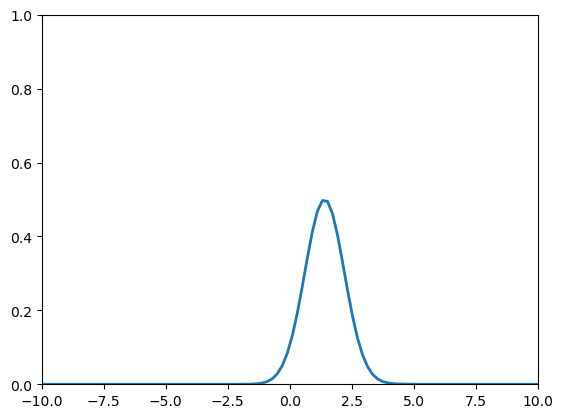

In [9]:
linspace = np.linspace(-10, 10, 100)
y_space = np.reshape(linspace, (-1, 1))

base_x = X[0]
base_x_permuted = np.repeat(np.reshape(base_x, (1,-1)), X.shape[0], axis=0)
base_x_permuted[:,0] = np.sort(X[:,0])

indices = range(len(base_x_permuted))

precomputed_densities = []
for x in base_x_permuted[indices]:
    x_space = np.repeat(np.reshape(x, (1,-1)), 100, axis=0)
    densities = density_simulator.pdf(x_space, y_space)
    precomputed_densities.append(densities)

# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((np.min(linspace), np.max(linspace)))
ax.set_ylim((0, 1))  # Adjust y limits if needed based on your densities

line, = ax.plot([], [], lw=2)

# Initialization function: plot the background of each frame
def init():
    line.set_data(linspace, precomputed_densities[0])
    return (line,)

# Animation function: this is called sequentially
def animate(i):
    line.set_data(linspace, precomputed_densities[i])
    #ax.set_title(f'Frame {indices[i]}')
    return (line,)

print("Starting Animation")
# Call the animator
ani = FuncAnimation(fig, animate, init_func=init,
                    frames=range(len(indices)), interval=10, blit=True)

# Show the animation
plt.show()

In [ ]:
ani.save(filename="pillow_example.gif", writer="pillow")